In [13]:
import skimage
print(skimage.__version__)
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, io, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc

0.21.0


ImportError: cannot import name 'viewer' from 'skimage' (C:\Users\VIGHNESH GAVIT\AppData\Roaming\Python\Python311\site-packages\skimage\__init__.py)

In [4]:
im = Image.open("../Images/parrot.png") # read the image, provide the correct path
print(im.width, im.height, im.mode, im.format, type(im))
# 453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>
im.show() # display the image

453 340 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


In [5]:
im_g = im.convert('L') # convert the RGB color image to a grayscale image
im_g.save('../Images/parrot_gray.png') # save the image to disk
Image.open("../Images/parrot_gray.png").show() # read the grayscale image from disk and show

(960, 1280, 4) float32 <class 'numpy.ndarray'>


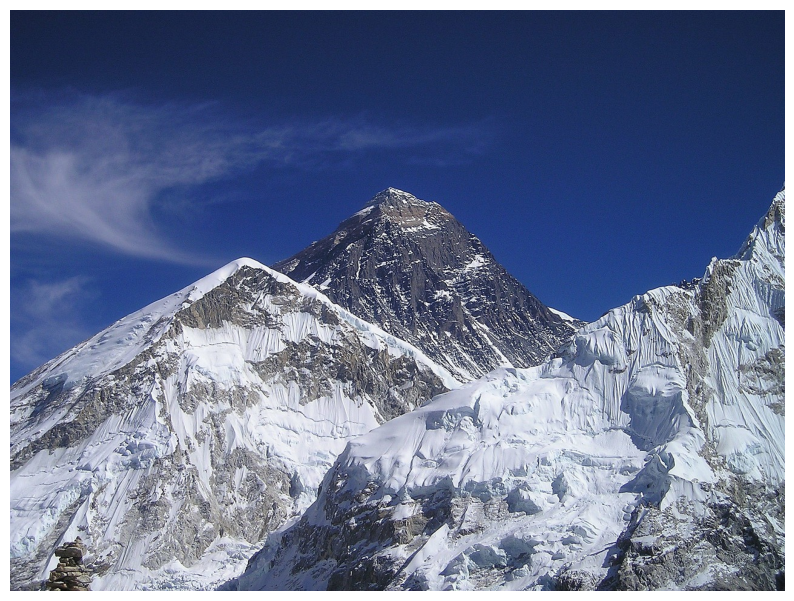

In [6]:
im = mpimg.imread("../Images/hill.png") # read the image from disk as a numpy ndarray
print(im.shape, im.dtype, type(im)) # this image contains an α channel, hence num_channels= 4
# (960, 1280, 4) float32 <class 'numpy.ndarray'>
plt.figure(figsize=(10,10))
plt.imshow(im) # display the image
plt.axis('off')
plt.show()

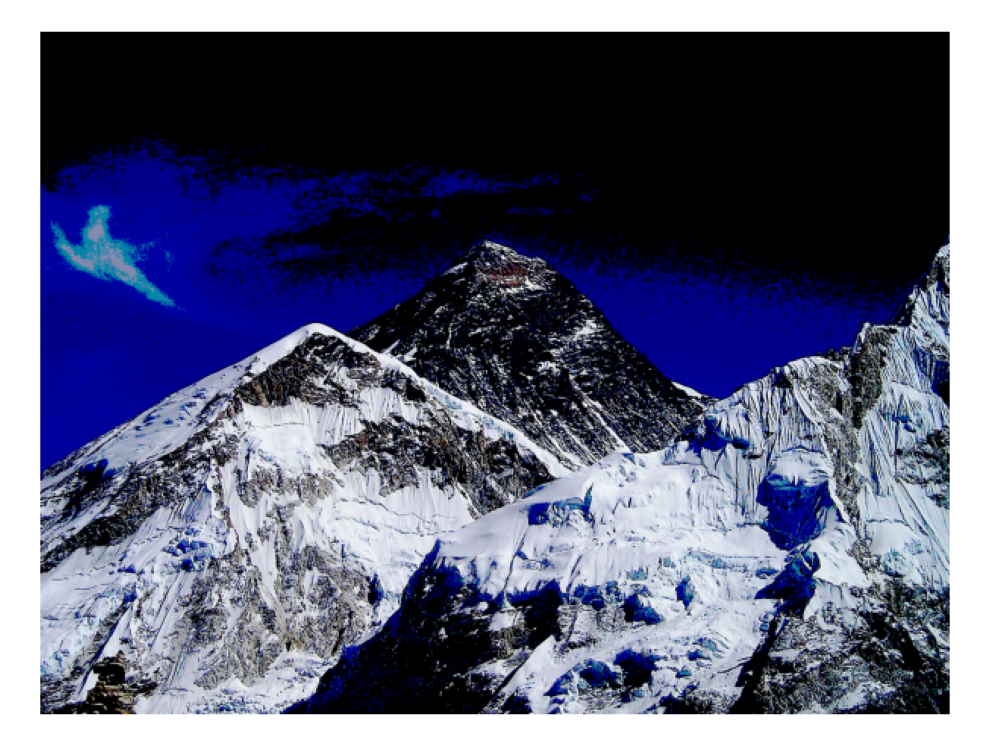

In [7]:
im1 = im
im1[im1 < 0.5] = 0 # make the image look darker
plt.imshow(im1)
plt.axis('off')
plt.tight_layout()
plt.savefig("../Images/hill_dark.png") # save the dark image
plt.close()
im = mpimg.imread("../Images/hill_dark.png") # read the dark image
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis('off') # no axis ticks
plt.tight_layout()
plt.show()

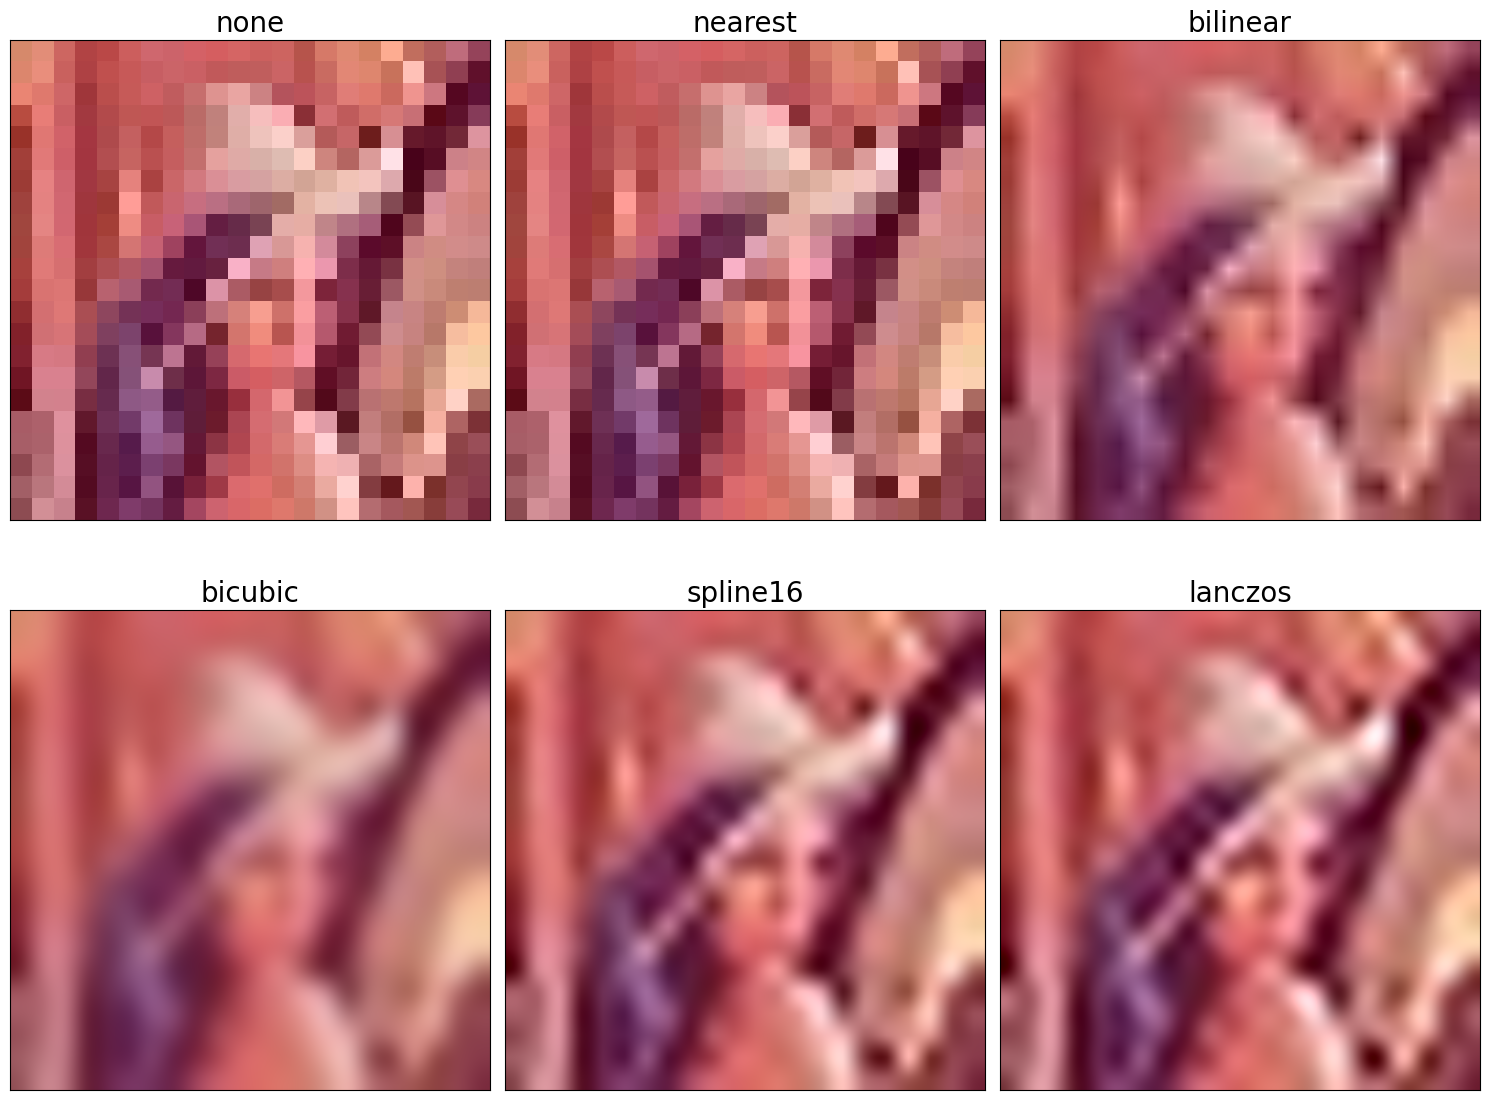

In [8]:
im = mpimg.imread("../Images/lena_small.jpg") # read the image from disk as a numpy ndarray
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 12), subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)
plt.tight_layout()
plt.show()

Original Image: Shape - (340, 453, 3), Dtype - uint8, Type - <class 'numpy.ndarray'>
Image saved successfully.


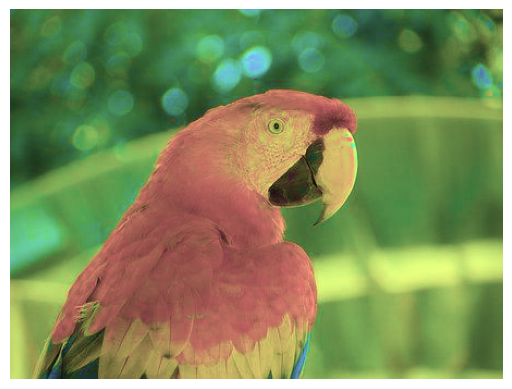

In [9]:
# Read the image from disk (provide the correct path)
im = io.imread("../Images/parrot.png")

# Check image properties
print("Original Image: Shape - {}, Dtype - {}, Type - {}".format(im.shape, im.dtype, type(im)))

# Convert the image to the HSV color space
hsv = color.rgb2hsv(im)

# Modify the saturation channel (e.g., reduce saturation to 0.5)
hsv[:, :, 1] = 0.5

# Convert the image back to RGB from HSV
im1 = color.hsv2rgb(hsv)

# Save the modified image to disk (provide the correct path)
try:
    # Convert the image to 8-bit format (uint8) before saving with PIL
    im1 = (im1 * 255).astype('uint8')
    pil_image = Image.fromarray(im1)
    pil_image.save('../Images/parrot_hsv.png')
    print("Image saved successfully.")
except Exception as e:
    print("Error saving the image:", e)

# Read and display the saved image
try:
    im = io.imread("../Images/parrot_hsv.png")
    plt.axis('off')
    plt.imshow(im)
    plt.show()
except Exception as e:
    print("Error reading and displaying the saved image:", e)

In [11]:
viewer.ImageViewer(im).show()

NameError: name 'viewer' is not defined

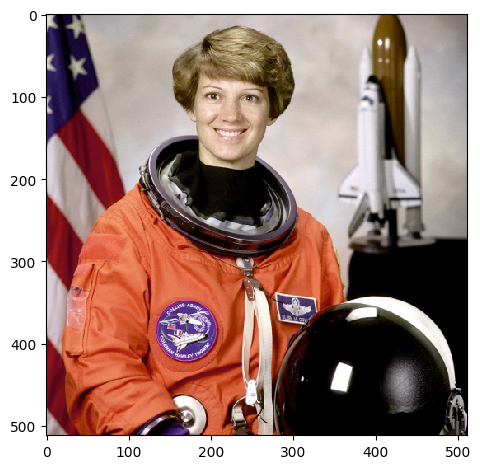

(<matplotlib.image.AxesImage at 0x226234b0710>, None)

In [14]:
im = data.astronaut()
imshow(im), show()

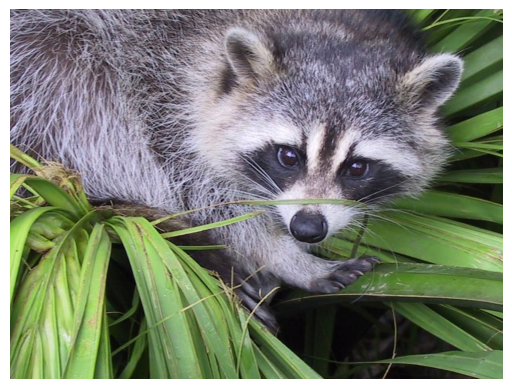

In [17]:
pil_image = Image.fromarray(im)

# Save the image using Pillow
pil_image.save('../Images/face.png')

# Display the saved image using Matplotlib
plt.imshow(im)
plt.axis('off')
plt.show()

In [21]:
im = imread('../Images/pepper.jpg')
pil_image = Image.fromarray(im)

# Display the saved image using Matplotlib
print(type(im), im.shape, im.dtype)
# <class 'numpy.ndarray'> (225, 225, 3) uint8

<class 'numpy.ndarray'> (225, 225, 3) uint8


<class 'numpy.ndarray'> (225, 225, 3) uint8


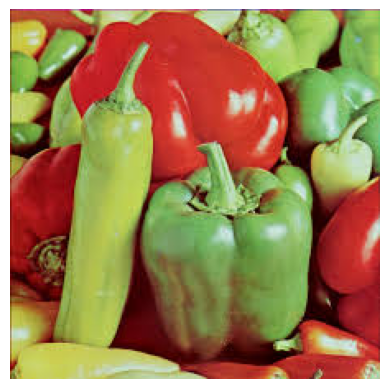

(<matplotlib.image.AxesImage at 0x22621f71210>,
 (-0.5, 224.5, 224.5, -0.5),
 None)

In [23]:
import imageio.v2 as imageio
im = imageio.imread('../Images/pepper.jpg')
print(type(im), im.shape, im.dtype)
plt.imshow(im), plt.axis('off'), plt.show()

In [24]:
im = Image.open("../Images/parrot.png")
print(im.mode)
im.save("../Images/parrot.jpg")

RGB


In [25]:
im = Image.open("../Images/hill.png")
print(im.mode)
# RGBA
im.convert('RGB').save("../Images/hill.jpg") # first convert to RGB mode

RGBA


(340, 453)


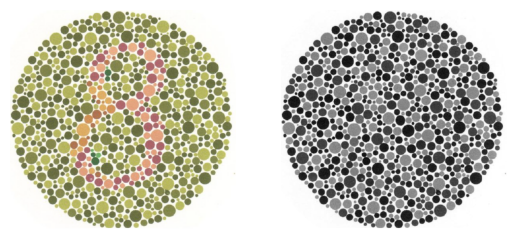

In [27]:
im = imread("../Images/parrot.png", as_gray=True)
print(im.shape)
im = imread("../Images/Ishihara.png")
im_g = color.rgb2gray(im)
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.axis('off')
plt.subplot(122), plt.imshow(im_g, cmap='gray'), plt.axis('off')
plt.show()

<Figure size 640x480 with 0 Axes>

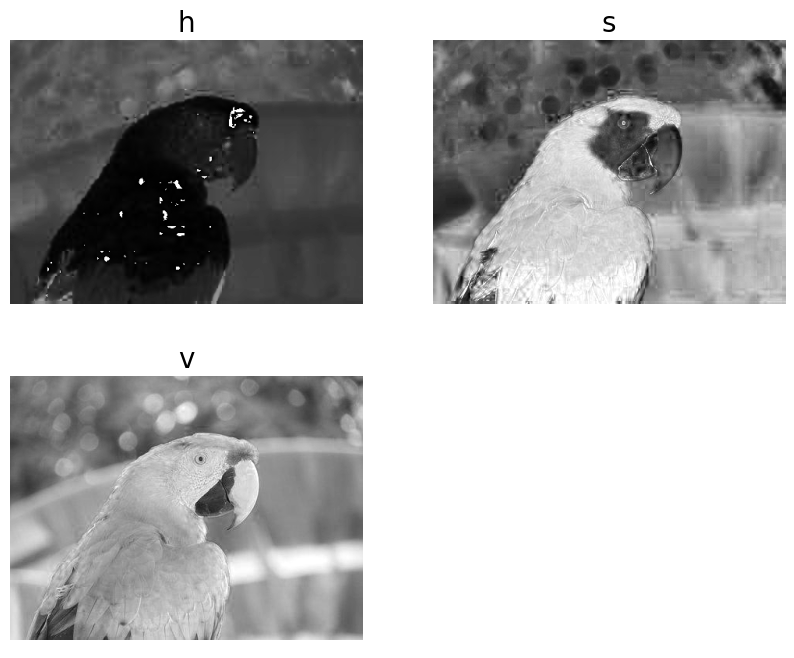

In [28]:
im = imread("../Images/parrot.png")
im_hsv = color.rgb2hsv(im)
plt.gray()
plt.figure(figsize=(10,8))
plt.subplot(221), plt.imshow(im_hsv[...,0]), plt.title('h', size=20),
plt.axis('off')
plt.subplot(222), plt.imshow(im_hsv[...,1]), plt.title('s', size=20),
plt.axis('off')
plt.subplot(223), plt.imshow(im_hsv[...,2]), plt.title('v', size=20),
plt.axis('off')
plt.subplot(224), plt.axis('off')
plt.show()

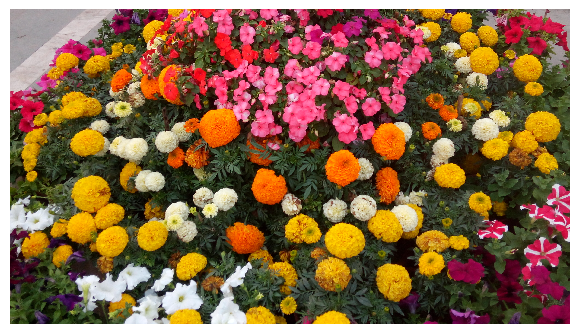

((-0.5, 4095.5, 2303.5, -0.5), None)

In [30]:
im = Image.open('../Images/flowers.png') # read image into an Image object with PIL
im = np.array(im) # create a numpy ndarray from the Image object
imshow(im) # use skimage imshow to display the image
plt.axis('off'), show()